In [3]:
from sqlalchemy import *
import psycopg2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext sql
%config SqlMagic.displaylimit = 5
import os.path
import yaml
import seaborn as sns

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
profiles = {}
paths = [
    os.path.join(os.path.expanduser('~'), '.dbt/profiles.yml')
]
for path in paths:
    if os.path.isfile(path):
        with open(path, 'r') as f:
            m = yaml.safe_load(f)
            profiles.update(m)

connect_to_db = ('postgresql+psycopg2://' + 
                 profiles['user']['outputs']['revboss-redshift']['user'] + ':' + 
                 profiles['user']['outputs']['revboss-redshift']['pass'] + '@' + 
                 profiles['user']['outputs']['revboss-redshift']['host'] + ':' + 
                 str(profiles['user']['outputs']['revboss-redshift']['port']) + '/' + 
                 profiles['user']['outputs']['revboss-redshift']['dbname'])

%sql $connect_to_db

'Connected: root@revboss'

In [5]:
%%sql

with ledger as (

  select * from analytics.quickbooks_ledger_xf
  
), accounts as (

  select * from analytics.quickbooks_accounts_xf
  
)

select ledger.date_month, accounts.type as line, sum(total)::int as amount
from ledger
  inner join accounts on ledger.account_id = accounts.id
where accounts.statement = 'is'
group by 1, 2
order by 1

95 rows affected.


date_month,line,amount
2014-11-01,Other Income,0
2014-11-01,Income,2400
2014-11-01,Expense,0
2014-11-01,Cost of Goods Sold,0
2014-11-01,Other Expense,0


In [6]:
is_source = _.DataFrame()

In [21]:
is_source['date_month'] = pd.to_datetime(is_source['date_month'])

In [23]:
#pivot the source data so that it can be operated on in series
income_statement = is_source.pivot(index='date_month', columns='line', values='amount')

#add calculated rows
income_statement['Total Income'] = income_statement['Income'] + income_statement['Other Income']
income_statement['Operating Income'] = income_statement['Total Income'] - income_statement['Cost of Goods Sold']
income_statement['Gross Margin %'] = income_statement['Operating Income'] / income_statement['Total Income']
income_statement['Total Expense'] = income_statement['Expense'] + income_statement['Other Expense']
income_statement['Net Income'] = income_statement['Operating Income'] - income_statement['Total Expense']
income_statement['Profit Margin'] = income_statement['Net Income'] / income_statement['Total Income']

#order the columns logically
income_statement = income_statement[['Income', 'Other Income', 'Total Income', 'Cost of Goods Sold', 
                                     'Operating Income', 'Gross Margin %', 'Expense', 'Other Expense',
                                     'Total Expense', 'Net Income', 'Profit Margin'
                                    ]]

In [24]:
is_summary_plot = income_statement[['Total Income', 'Total Expense', 'Net Income']]

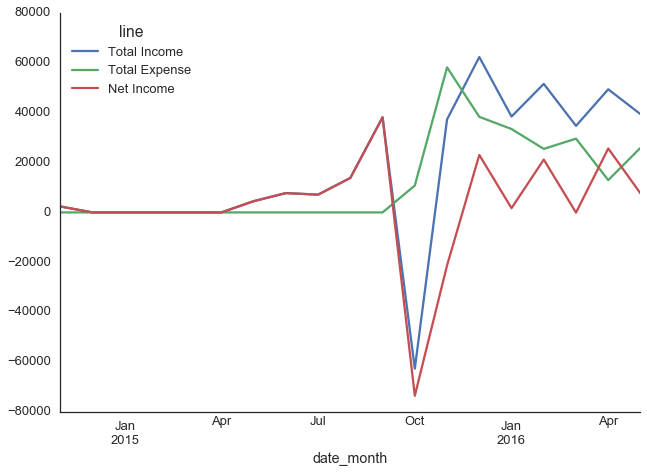

In [25]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(8, 6))
is_summary_plot.plot()
sns.despine()

In [56]:
start_month = str(int(time.strftime("%Y")) - 1) + "-" + time.strftime("%m")
end_month = time.strftime("%Y") + "-" + str(int(time.strftime("%m")) - 1)
income_statement.loc[start_month:end_month].transpose()

date_month,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00
line,,,,,,,,,,,,
Income,4500.0,7750.0,7121.0,13830.0,38150.0,-62650.000000,37300.000000,62313.000000,38450.000000,51550.000000,34701.000000,49361.000000
Other Income,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.000000,9.000000,10.000000,9.000000
Total Income,4500.0,7750.0,7121.0,13830.0,38150.0,-62650.000000,37300.000000,62313.000000,38452.000000,51559.000000,34711.000000,49370.000000
Cost of Goods Sold,0.0,0.0,0.0,0.0,0.0,99.000000,366.000000,941.000000,3290.000000,4897.000000,5197.000000,10768.000000
Operating Income,4500.0,7750.0,7121.0,13830.0,38150.0,-62749.000000,36934.000000,61372.000000,35162.000000,46662.000000,29514.000000,38602.000000
Gross Margin %,1.0,1.0,1.0,1.0,1.0,1.001580,0.990188,0.984899,0.914439,0.905021,0.850278,0.781892
Expense,0.0,0.0,0.0,0.0,0.0,10775.000000,58176.000000,38330.000000,33449.000000,25476.000000,29587.000000,12954.000000
Other Expense,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total Expense,0.0,0.0,0.0,0.0,0.0,10775.000000,58176.000000,38330.000000,33449.000000,25476.000000,29587.000000,12954.000000


'2015-05'

2015-05
